<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro-to-Pytorch" data-toc-modified-id="Intro-to-Pytorch-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro to Pytorch</a></span><ul class="toc-item"><li><span><a href="#Pytorch-tensors" data-toc-modified-id="Pytorch-tensors-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Pytorch tensors</a></span></li><li><span><a href="#Pytorch-Autograd" data-toc-modified-id="Pytorch-Autograd-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Pytorch Autograd</a></span></li><li><span><a href="#torch.nn-module" data-toc-modified-id="torch.nn-module-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>torch.nn module</a></span></li></ul></li><li><span><a href="#Linear-Regression-with-Pytorch" data-toc-modified-id="Linear-Regression-with-Pytorch-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Linear Regression with Pytorch</a></span><ul class="toc-item"><li><span><a href="#Gradient-Descent-with-Pytorch" data-toc-modified-id="Gradient-Descent-with-Pytorch-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Gradient Descent with Pytorch</a></span></li><li><span><a href="#Simplified-GD-Loop" data-toc-modified-id="Simplified-GD-Loop-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Simplified GD Loop</a></span><ul class="toc-item"><li><span><a href="#Models-in-Pytorch" data-toc-modified-id="Models-in-Pytorch-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Models in Pytorch</a></span></li></ul></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#How-to-take-a-vector-back-to-numpy?" data-toc-modified-id="How-to-take-a-vector-back-to-numpy?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>How to take a vector back to numpy?</a></span></li><li><span><a href="#Exercise:" data-toc-modified-id="Exercise:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Exercise:</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>References</a></span></li></ul></div>

In [1]:
# import pytorch libraries
%matplotlib inline
import torch 
import torch.autograd as autograd 
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

# Intro to Pytorch

PyTorch consists of 4 main packages:
* torch: a general purpose array library similar to Numpy that can do computations on GPU
* torch.autograd: a package for automatically obtaining gradients
* torch.nn: a neural net library with common layers and cost functions
* torch.optim: an optimization package with common optimization algorithms like SGD, Adam, etc

## Pytorch tensors
Like Numpy tensors but can utilize GPUs to accelerate its numerical computations. 

In [52]:
# creating tensors from lists or numpy arrays
x = torch.tensor([[1, 2],[3, 4]])
x.shape

torch.Size([2, 2])

In [53]:
# Create random tensor
N = 5
x = torch.randn(N, 10).type(torch.FloatTensor)

In [54]:
x

tensor([[ 1.0065, -1.3105,  0.5226,  2.2072, -0.5752, -1.1019,  1.0525,  0.8034,
          1.1506, -0.5822],
        [-0.4955, -0.1096, -0.5349, -0.3082, -0.2941,  1.2675,  0.9798,  1.0569,
         -1.5108, -0.5627],
        [-1.1474,  1.5807, -0.7938,  0.9268, -0.8612,  2.2317, -0.0980, -1.7573,
          2.3066,  1.0729],
        [ 0.6293, -0.9167,  0.8247,  1.5185, -0.3005, -0.2514,  1.1836,  0.6375,
          0.5082,  0.1519],
        [ 0.7071, -0.0634, -0.8860, -1.2036, -0.3730,  0.9233,  0.7118,  1.4800,
         -0.0972, -0.1401]])

In [55]:
# reshaping of tensors using .view()
x.view(1,-1) #-1 makes torch infer the second dim

tensor([[ 1.0065, -1.3105,  0.5226,  2.2072, -0.5752, -1.1019,  1.0525,  0.8034,
          1.1506, -0.5822, -0.4955, -0.1096, -0.5349, -0.3082, -0.2941,  1.2675,
          0.9798,  1.0569, -1.5108, -0.5627, -1.1474,  1.5807, -0.7938,  0.9268,
         -0.8612,  2.2317, -0.0980, -1.7573,  2.3066,  1.0729,  0.6293, -0.9167,
          0.8247,  1.5185, -0.3005, -0.2514,  1.1836,  0.6375,  0.5082,  0.1519,
          0.7071, -0.0634, -0.8860, -1.2036, -0.3730,  0.9233,  0.7118,  1.4800,
         -0.0972, -0.1401]])

## Pytorch Autograd
The autograd package in PyTorch provides classes and functions implementing automatic differentiation of arbitrary scalar valued function. For example, the gradient of the error with respect to all parameters.

In order for this to happen we need to declare our paramerers as Tensors with the requires_grad=True keyword. Here is an example:

In [74]:
x = torch.tensor([1., 2., 3., 4., 5., 6.], requires_grad=True)

In [75]:
x.grad

In [76]:
2*x**2 + 1

tensor([ 3.,  9., 19., 33., 51., 73.], grad_fn=<AddBackward0>)

In [77]:
L = (2*x**2 +1).sum()
L

tensor(188., grad_fn=<SumBackward0>)

In [78]:
L.backward() # computes the grad of L with respect to x

In [79]:
x.grad

tensor([ 4.,  8., 12., 16., 20., 24.])

In [80]:
# here is another example
x = torch.randn(2, 3)
x.requires_grad = True
x

tensor([[-0.7605,  1.9789, -1.1921],
        [-0.7827, -0.1883, -1.4586]], requires_grad=True)

In [81]:
L = (x**2).sum()
L

tensor(8.6910, grad_fn=<SumBackward0>)

In [82]:
L.backward()
x.grad # note, it is the same shape as x

tensor([[-1.5211,  3.9578, -2.3842],
        [-1.5653, -0.3766, -2.9171]])

## torch.nn module
A neural net library with common layers and cost functions

`nn.Linear(5, 3)` creates a linear transformation ($A\cdot X+b$) of a $N \times 5$ matrix into a $N \times 3$ matrix, where N can be anything (number of observations).

In [84]:
D = 5 # number of input featutes
M = 3 # neurons in the first hidden layer
linear_map = nn.Linear(D, M)

In [85]:
# parameters are initialized randomly
[p for p in linear_map.parameters()]

[Parameter containing:
 tensor([[ 0.1198, -0.0453, -0.2542, -0.0780,  0.3376],
         [ 0.1268, -0.0038, -0.4344,  0.0947,  0.3005],
         [-0.1481,  0.2717,  0.2109, -0.3708, -0.0754]], requires_grad=True),
 Parameter containing:
 tensor([-0.4226, -0.3958, -0.4254], requires_grad=True)]

In [86]:
[p.shape for p in linear_map.parameters()]

[torch.Size([3, 5]), torch.Size([3])]

#  Linear Regression with Pytorch

The goal of linear regression is to fit a line to a set of points.

In [87]:
# Here we generate some fake data
def lin(a,b,x): return a*x+b

def gen_fake_data(n, a, b):
    x = np.random.uniform(0,1,n) 
    y = lin(a,b,x) + 0.1 * np.random.normal(0,3,n)
    return x, y

x, y = gen_fake_data(50, 3., 8.)

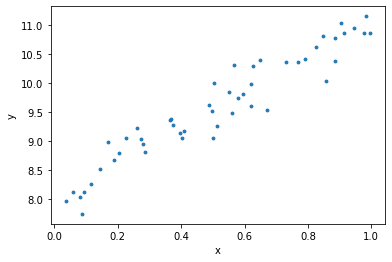

In [88]:
import matplotlib.pyplot as plt
plt.scatter(x,y, s=8); plt.xlabel("x"); plt.ylabel("y"); 

You want to find **parameters** (weights) $a$ and $b$ such that you minimize the *error* between the points and the line $a\cdot x + b$. Note that here $a$ and $b$ are unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error** ($\sum_i (\hat{y}_i - y_i)^2$). 

In [89]:
def mse(y_hat, y): return ((y_hat - y) ** 2).mean()

Suppose we believe $a = 10$ and $b = 5$ then we can compute `y_hat` which is our *prediction* and then compute our error.

In [90]:
y_hat = lin(10,5,x)
mse(y_hat, y)

4.315993750135441

In [91]:
def mse_loss(a, b, x, y): return mse(lin(a,b,x), y)

In [92]:
mse_loss(10, 5, x, y)

4.315993750135441

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for $a$ and $b$? How do we find the best *fitting* linear regression.

## Gradient Descent with Pytorch

For a fixed dataset $x$ and $y$ `mse_loss(a,b)` is a function of $a$ and $b$. We would like to find the values of $a$ and $b$ that minimize that function.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [93]:
# generate some more data
x, y = gen_fake_data(10000, 3., 8.)
x.shape, y.shape

((10000,), (10000,))

In [94]:
# Wrap x and y as tensor 
x = torch.tensor(x)
y = torch.tensor(y)

In [95]:
# Create random Tensors for weights, and wrap them in tensors.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these tensors during the backward pass.
a, b = np.random.randn(1), np.random.randn(1)
a = torch.tensor(a, requires_grad=True)
b = torch.tensor(b, requires_grad=True)
a,b

(tensor([0.9858], dtype=torch.float64, requires_grad=True),
 tensor([1.4596], dtype=torch.float64, requires_grad=True))

In [96]:
learning_rate = 1e-3
for t in range(10000):
    # Forward pass: compute predicted y using operations on Variables
    loss = mse_loss(a,b,x,y)
    if t % 1000 == 0: print(loss.item())
    
    # Computes the gradient of loss with respect to all Variables with requires_grad=True.
    # After this call a.grad and b.grad will be Variables holding the gradient
    # of the loss with respect to a and b respectively
    loss.backward()
    
    # Update a and b using gradient descent; a.data and b.data are Tensors,
    # a.grad and b.grad are Variables and a.grad.data and b.grad.data are Tensors
    a.data -= learning_rate * a.grad.data
    b.data -= learning_rate * b.grad.data
    
    # Zero the gradients
    a.grad.data.zero_()
    b.grad.data.zero_()    

57.410181931250335
0.5297583258938735
0.15683268693929575
0.1398169861492861
0.12839956882141362
0.11962190508633316
0.1128657048364274
0.10766538288263548
0.10366263732914219
0.10058167962722271


In [97]:
print(a,b)

tensor([3.3293], dtype=torch.float64, requires_grad=True) tensor([7.8235], dtype=torch.float64, requires_grad=True)


## Simplified GD Loop

In [27]:
# linear tranformation with input dimension=1 and output dimension=1
nn.Linear(1, 1)

Linear(in_features=1, out_features=1, bias=True)

### Models in Pytorch

In [98]:
# simple way of specifying a linear regression model
model = torch.nn.Sequential(
    nn.Linear(1, 1),
)
model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

In [99]:
# equivalent way of specifiying the same model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.lin = nn.Linear(1, 1)
        
    def forward(self, x):
        x = self.lin(x)
        return x 
model =  LinearRegression()

In [100]:
# note here we have just two parameters, why?
print([p for p in model.parameters()])

[Parameter containing:
tensor([[-0.6001]], requires_grad=True), Parameter containing:
tensor([0.1698], requires_grad=True)]


In [101]:
x, y = gen_fake_data(10000, 3., 8.)
x = torch.tensor(x).float()
y = torch.tensor(y).float()
x.shape

torch.Size([10000])

In [102]:
# you have to be careful with the dimensions that your model is expecting
x = torch.unsqueeze(x, 1)
x.shape

torch.Size([10000, 1])

In [103]:
y_hat = model(x)
print(y_hat)

tensor([[-0.2879],
        [-0.0557],
        [-0.3359],
        ...,
        [-0.0240],
        [-0.0311],
        [ 0.1233]], grad_fn=<AddmmBackward>)


In [104]:
y_hat.shape

torch.Size([10000, 1])

In [105]:
y.shape

torch.Size([10000])

In [106]:
y = y.unsqueeze(1)
F.mse_loss(y_hat, y)

tensor(94.0537, grad_fn=<MseLossBackward>)

In [107]:
# validation data
x_val, y_val = gen_fake_data(1000, 3., 8.)
x_val = torch.tensor(x_val).float().unsqueeze(1)
y_val = torch.tensor(y_val).float().unsqueeze(1)

In [108]:
# Use the optim package to define an Optimizer that will update the 
# weights of
# the model for us. Here we will use Adam
learning_rate = 0.1
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [109]:
for t in range(10000):
    # Forward pass: compute predicted y using operations on Variables
    model.train() # some layers have different behavior during train/and evaluation
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)
       
    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables
    optimizer.zero_grad()
    loss.backward()
    
    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    
    # checking validation loss
    model.eval()  # some layers have different behavior during train/and evaluation
    y_hat_val = model(x_val)
    val_loss = F.mse_loss(y_hat_val, y_val)
    
    if t % 1000 == 0: print("train loss %.3f valid loss %.3f" % (loss.item(), val_loss.item()))

train loss 94.054 valid loss 89.670
train loss 0.108 valid loss 0.106
train loss 0.094 valid loss 0.091
train loss 0.091 valid loss 0.088
train loss 0.090 valid loss 0.087
train loss 0.089 valid loss 0.087
train loss 0.089 valid loss 0.087
train loss 0.089 valid loss 0.087
train loss 0.089 valid loss 0.087
train loss 0.089 valid loss 0.087


In [110]:
print([p for p in model.parameters()])

[Parameter containing:
tensor([[2.9973]], requires_grad=True), Parameter containing:
tensor([8.0045], requires_grad=True)]


# Logistic Regression

In [111]:
# generating fake data
# Here we generate some fake data
def lin(a,b,x): return a*x+b

def gen_logistic_fake_data(n, a, b):
    x = np.random.uniform(-20,20, (n, 2))
    x2_hat = lin(a,b, x[:,0])
    y = x[:,1] > x2_hat
    return x, y.astype(int)

x, y = gen_logistic_fake_data(100, 1., 0.5)

In [112]:
y

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

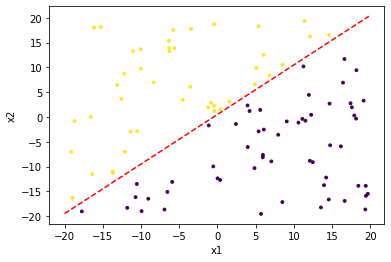

In [113]:
t = np.arange(-20, 20, 0.2)
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y, s=8);
plt.xlabel("x1"); plt.ylabel("x2");
plt.plot(t, t + 0.5, 'r--')

In [114]:
x = torch.tensor(x).float()
y = torch.tensor(y).float()

In [115]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1),
)
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)

In [116]:
model(x).shape

torch.Size([100, 1])

In [117]:
# generating train and val data
x, y = gen_logistic_fake_data(10000, 1., 0.5)
x = torch.tensor(x).float()
y = torch.tensor(y).float().unsqueeze(1)

x_val, y_val = gen_logistic_fake_data(1000, 1., 0.5)
x_val = torch.tensor(x_val).float()
y_val = torch.tensor(y_val).float().unsqueeze(1)

In [118]:
learning_rate = 0.1
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [119]:
for t in range(10000):
    # Forward pass: compute predicted y using operations on Variables
    model.train()
    y_hat = model(x)
    loss = F.binary_cross_entropy(torch.sigmoid(y_hat), y)
       
    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables
    optimizer.zero_grad()
    loss.backward()
    
    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    
    model.eval()
    y_hat_val = model(x_val)
    val_loss = F.binary_cross_entropy(torch.sigmoid(y_hat_val), y_val)
    
    if t % 1000 == 0: print("train loss %.3f valid loss %.3f" % (loss.item(), val_loss.item()))

train loss 0.380 valid loss 0.161
train loss 0.015 valid loss 0.015
train loss 0.012 valid loss 0.011
train loss 0.010 valid loss 0.009
train loss 0.008 valid loss 0.007
train loss 0.007 valid loss 0.006
train loss 0.006 valid loss 0.005
train loss 0.005 valid loss 0.003
train loss 0.004 valid loss 0.003
train loss 0.004 valid loss 0.002


In [120]:
print([p for p in model.parameters()])

[Parameter containing:
tensor([[-10.8642,  10.8753]], requires_grad=True), Parameter containing:
tensor([-5.6112], requires_grad=True)]


## How to take a vector back to numpy?

In [121]:
x, y = gen_logistic_fake_data(10, 1., 0.5)
x = torch.tensor(x).float()

In [122]:
x.numpy()

array([[ -2.3072705,  10.760361 ],
       [ 17.629942 ,  19.735785 ],
       [-15.760689 ,  -8.301015 ],
       [-19.339895 ,  19.83385  ],
       [  5.6111574,   6.8750906],
       [ 17.921926 ,  14.214071 ],
       [  6.9259534,   8.435971 ],
       [ -9.074593 ,  -1.0895311],
       [  9.3212385,  16.342587 ],
       [ 15.396296 ,   7.0311146]], dtype=float32)

## Exercise:
Compute the accuracy of the validation logistic regression model

## Need more?

https://pytorch.org/tutorials/beginner/basics/intro.html

# References
* https://pytorch.org/docs/stable/index.html
* http://pytorch.org/tutorials/beginner/pytorch_with_examples.html
* https://hsaghir.github.io/data_science/pytorch_starter/